In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as PercentFormatter
import numpy as np


In [2]:
df = pd.read_excel("Concept_Data Resep.xlsx")
df

,id,nama_resep,bahan_resep,bahan_alergen,daerah_resep,umur_resep
0,1,Bubur Hati Ayam,"nasi, hati ayam, bayam, minyak jagung, garam, ...",NaN,Indonesia,6-8 Bulan
1,2,Bubur Hati Ayam Santan,"nasi, hati ayam, wortel, santan, minyak kelapa...",NaN,Indonesia,6-8 Bulan
2,3,Bubur Pepes Hati Ayam,"nasi, hati ayam, wortel, minyak kelapa, tomat,...",NaN,Indonesia,6-8 Bulan
3,4,Bubur Udang Tahu,"nasi, udang giling, santan, tahu, tomat, keman...","udang, tahu",Indonesia,6-8 Bulan
4,5,Bubur Udang Buncis,"nasi, udang giling, buncis, minyak jagung, jer...",udang,Indonesia,6-8 Bulan
...,...,...,...,...,...,...
201,202,Ikan Dori Saus Mayo,"ikan dori, brokoli, tomat merah, mayonnaise, l...","ikan, mayonnaise",Indonesia,6-8 Bulan
202,203,Beef Stroganoff,"daging wagyu, mentega truffle garlic, bawang b...","mayonnaise, krim",Indonesia,6-8 Bulan
203,204,Buffalo Chicken Toast,"ayam bagian dada, mayonnaise, lada hitam, hima...","roti, mayonnaise",Indonesia,6-8 Bulan
204,205,Pancake Satan Keju Madu,"bubuk pancake, santan kara, susu uht full crea...","keju, mayonnaise",Indonesia,6-8 Bulan


In [3]:
df.duplicated().sum()


0

In [4]:
df['bahan_alergen'] = df['bahan_alergen'].str.split(',') #split alergi yg lebih dari satu
df = df.explode('bahan_alergen') #new row untuk yg dipisah
df

,id,nama_resep,bahan_resep,bahan_alergen,daerah_resep,umur_resep
0,1,Bubur Hati Ayam,"nasi, hati ayam, bayam, minyak jagung, garam, ...",NaN,Indonesia,6-8 Bulan
1,2,Bubur Hati Ayam Santan,"nasi, hati ayam, wortel, santan, minyak kelapa...",NaN,Indonesia,6-8 Bulan
2,3,Bubur Pepes Hati Ayam,"nasi, hati ayam, wortel, minyak kelapa, tomat,...",NaN,Indonesia,6-8 Bulan
3,4,Bubur Udang Tahu,"nasi, udang giling, santan, tahu, tomat, keman...",udang,Indonesia,6-8 Bulan
3,4,Bubur Udang Tahu,"nasi, udang giling, santan, tahu, tomat, keman...",tahu,Indonesia,6-8 Bulan
...,...,...,...,...,...,...
204,205,Pancake Satan Keju Madu,"bubuk pancake, santan kara, susu uht full crea...",keju,Indonesia,6-8 Bulan
204,205,Pancake Satan Keju Madu,"bubuk pancake, santan kara, susu uht full crea...",mayonnaise,Indonesia,6-8 Bulan
205,206,Egg Mayo Sando,"mayonnaise, roti tawar putih, telur puyuh, sus...",susu,Indonesia,6-8 Bulan
205,206,Egg Mayo Sando,"mayonnaise, roti tawar putih, telur puyuh, sus...",roti,Indonesia,6-8 Bulan


In [5]:
df['bahan_alergen'] = df['bahan_alergen'].str.lstrip()
df

,id,nama_resep,bahan_resep,bahan_alergen,daerah_resep,umur_resep
0,1,Bubur Hati Ayam,"nasi, hati ayam, bayam, minyak jagung, garam, ...",NaN,Indonesia,6-8 Bulan
1,2,Bubur Hati Ayam Santan,"nasi, hati ayam, wortel, santan, minyak kelapa...",NaN,Indonesia,6-8 Bulan
2,3,Bubur Pepes Hati Ayam,"nasi, hati ayam, wortel, minyak kelapa, tomat,...",NaN,Indonesia,6-8 Bulan
3,4,Bubur Udang Tahu,"nasi, udang giling, santan, tahu, tomat, keman...",udang,Indonesia,6-8 Bulan
3,4,Bubur Udang Tahu,"nasi, udang giling, santan, tahu, tomat, keman...",tahu,Indonesia,6-8 Bulan
...,...,...,...,...,...,...
204,205,Pancake Satan Keju Madu,"bubuk pancake, santan kara, susu uht full crea...",keju,Indonesia,6-8 Bulan
204,205,Pancake Satan Keju Madu,"bubuk pancake, santan kara, susu uht full crea...",mayonnaise,Indonesia,6-8 Bulan
205,206,Egg Mayo Sando,"mayonnaise, roti tawar putih, telur puyuh, sus...",susu,Indonesia,6-8 Bulan
205,206,Egg Mayo Sando,"mayonnaise, roti tawar putih, telur puyuh, sus...",roti,Indonesia,6-8 Bulan


In [6]:
#export data
df.to_csv('cleaned_data.csv', index=False)

In [7]:
count = df.groupby('bahan_alergen').size()
count

bahan_alergen
Mie                1
gelatin            1
ikan              44
kacang            28
kecap             11
keju              40
kerupuk udang      1
krim               1
mayonnaise         9
mentega           18
mie                2
minyak kedelai     3
minyak wijen       6
pasta              9
roti              14
saus tiram         2
susu              32
tahu              31
telur             40
tempe             14
tepung            38
tofu               2
udang             10
yogurt             8
dtype: int64

In [8]:
#karena beberapa resep tidak ada mengandung beberapa kategori alergen
#krim, whey, kasein, mayonnaise, meringue, minyak ikan, gelatin ikan, ebi, petis, terasi, kerupuk udang, koya, kerang, mustard, kerupuk kedelai, bumbu kacang

new_rows = [#{'bahan_alergen': 'krim', 'total_resep': 0},
            {'bahan_alergen': 'whey', 'total_resep': 0},
            {'bahan_alergen': 'kasein', 'total_resep': 0},
            #{'bahan_alergen': 'mayonnaise', 'total_resep': 0},
            {'bahan_alergen': 'meringue', 'total_resep': 0},
            {'bahan_alergen': 'minyak ikan', 'total_resep': 0},
            {'bahan_alergen': 'gelatin ikan', 'total_resep': 0},
            #{'bahan_alergen': 'ebi', 'total_resep': 0},
            {'bahan_alergen': 'petis', 'total_resep': 0},
            {'bahan_alergen': 'terasi', 'total_resep': 0},
            #{'bahan_alergen': 'kerupuk udang', 'total_resep': 0},
            {'bahan_alergen': 'koya', 'total_resep': 0},
            {'bahan_alergen': 'kerang', 'total_resep': 0},
            {'bahan_alergen': 'mustard', 'total_resep': 0},
            {'bahan_alergen': 'kerupuk kedelai', 'total_resep': 0},
            {'bahan_alergen': 'bumbu kacang', 'total_resep': 0}]

df_y = pd.DataFrame(new_rows)

In [9]:
df_v = df.groupby('bahan_alergen')['nama_resep'].count().reset_index()
df_v.columns = ['bahan_alergen', 'total_resep']
df_v

,bahan_alergen,total_resep
0,Mie,1
1,gelatin,1
2,ikan,44
3,kacang,28
4,kecap,11
5,keju,40
6,kerupuk udang,1
7,krim,1
8,mayonnaise,9
9,mentega,18


In [10]:
df_v = pd.concat([df_v, df_y], ignore_index=True)

In [19]:
df_v_sorted = df_v.sort_values(by='total_resep',ascending=False)
print(df_v_sorted)

      bahan_alergen  total_resep      circum
2              ikan           44   12.602740
18            telur           40   80.273973
5              keju           40   34.246575
20           tepung           38   94.520548
16             susu           32   60.821918
17             tahu           31   69.315068
3            kacang           28   20.273973
9           mentega           18   42.191781
14             roti           14   51.506849
19            tempe           14   84.109589
4             kecap           11   23.287671
22            udang           10   97.808219
8        mayonnaise            9   37.260274
13            pasta            9   47.671233
23           yogurt            8  100.000000
12     minyak wijen            6   45.205479
11   minyak kedelai            3   43.561644
15       saus tiram            2   52.054795
21             tofu            2   95.068493
10              mie            2   42.739726
0               Mie            1    0.273973
1         

C:\Users\Faraz\AppData\Local\Temp\ipykernel_8124\3557407810.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=45, ha='right')


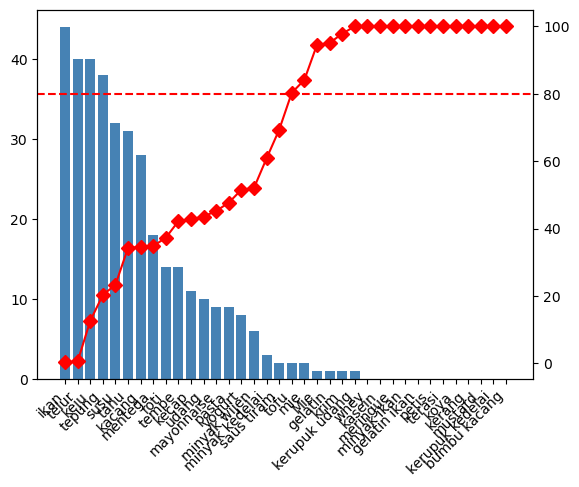

In [11]:
color1= 'steelblue'
color2= 'red'
color3= 'yellow'
line_size = 4
df_v['circum'] = df_v['total_resep'].cumsum()/df_v['total_resep'].sum()*100
df_v_sorted = df_v.sort_values(by='total_resep', ascending=False)
labels = df_v_sorted['bahan_alergen']
data = df_v_sorted['total_resep']

fig, ax = plt.subplots()
ax.bar(labels, data, color=color1)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax2 = ax.twinx()
ax2.plot(labels, df_v['circum'], color=color2, marker="D", ms=7)

plt.axhline(y=80, color=color2, linestyle='--') #threshold line 80%
plt.show()